In [3]:
import pandas as pd
df = pd.read_csv('Week7_train.csv')

In [4]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [6]:
# Step 2: Import the train data (Assumed as CSV)
dataset_path = "Week7_train.csv"  # Change this if needed
df = pd.read_csv(dataset_path)


In [7]:
# Step 3: Check shape of the data
print("Dataset Shape:", df.shape)

Dataset Shape: (42000, 785)


In [8]:
# Step 4: Select only 10% of the data
df_sample=df.sample(frac=0.1)
print(df_sample)
print(df_sample.shape)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
17319      3       0       0       0       0       0       0       0       0   
29886      9       0       0       0       0       0       0       0       0   
38052      5       0       0       0       0       0       0       0       0   
40089      6       0       0       0       0       0       0       0       0   
26351      0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
16243      9       0       0       0       0       0       0       0       0   
25036      8       0       0       0       0       0       0       0       0   
29682      8       0       0       0       0       0       0       0       0   
4164       2       0       0       0       0       0       0       0       0   
5231       7       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [9]:
# Step 5: Print shape of selected dataset
print("Selected Data Shape:", df_sample.shape)

Selected Data Shape: (4200, 785)


In [10]:
# Step 6: Look at the top 5 rows
print(df_sample.head())

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
17319      3       0       0       0       0       0       0       0       0   
29886      9       0       0       0       0       0       0       0       0   
38052      5       0       0       0       0       0       0       0       0   
40089      6       0       0       0       0       0       0       0       0   
26351      0       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
17319       0  ...         0         0         0         0         0   
29886       0  ...         0         0         0         0         0   
38052       0  ...         0         0         0         0         0   
40089       0  ...         0         0         0         0         0   
26351       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
17319         0         0   

In [11]:
# Step 7: Find the number of unique class labels
unique_classes = df_sample.iloc[:,-1].nunique()


print("Number of Unique Class Labels:", unique_classes)

Number of Unique Class Labels: 1


In [12]:
# Step 8: Print number of examples for each class label
cal=df_sample.iloc[:,-1].value_counts()
print(cal)

pixel783
0    4200
Name: count, dtype: int64


In [26]:
# Step 9: Prepare X (features) and Y (labels)
Y = df_sample.iloc[:, 0].values  # First column as dependent variable (target)
X = df_sample.iloc[:, 1:].values # All remaining columns as independent variables (features)

# Y=df_sample["label"]
# X=df_sample.drop(columns='label')

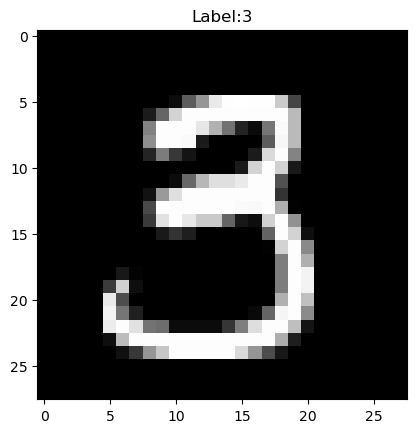

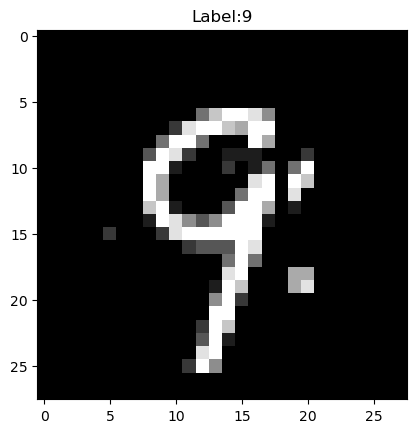

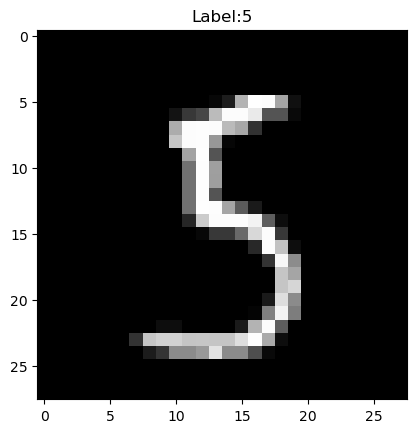

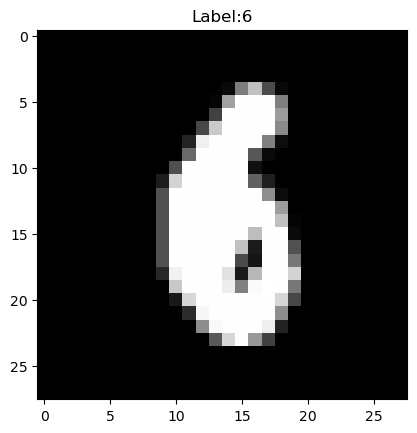

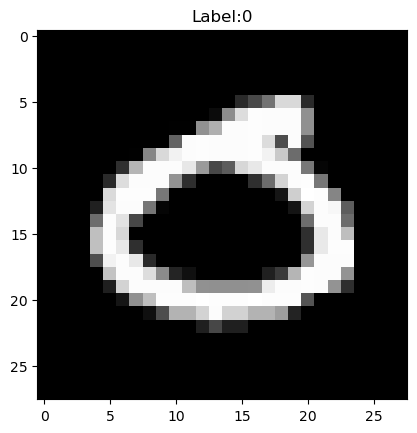

In [27]:
# Step 10: Visualize the first 5 images (if applicable)
import matplotlib.pyplot as plt
if X.shape[1]>=28*28:
    for i in range(5):
        plt.imshow(X[i].reshape(28,28),cmap='gray')
        plt.title(f"Label:{Y[i]}")
        plt.show()
        


In [29]:
# Step 11: Split dataset into train (75%) and validation (25%)
from sklearn.model_selection import train_test_split
X_test,X_valid,y_test,y_valid=train_test_split(X,Y,test_size=0.2)
print(X_test.shape,X_valid.shape,y_test.shape,y_valid.shape)

(3360, 784) (840, 784) (3360,) (840,)


In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3360, 784) (840, 784) (3360,) (840,)


In [30]:
# Step 12,13: Fit KNN classifier to training data
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_valid, y_valid)

KNeighborsClassifier()

In [ ]:
# Step 14: Predict validation set results
y_pred=knn.predict(X_test)


In [ ]:
# Step 15: Print the confusion matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
con=confusion_matrix(y_test,y_pred)
print("confusion mat",con)

In [ ]:
# Step 16: Print classification report and accuracy
cl=classification_report(y_pred,y_test)
ac=accuracy_score(y_pred,y_test)
print("classify",cl)
print("acc",ac)

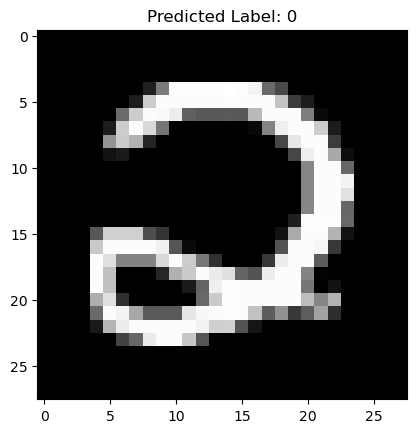

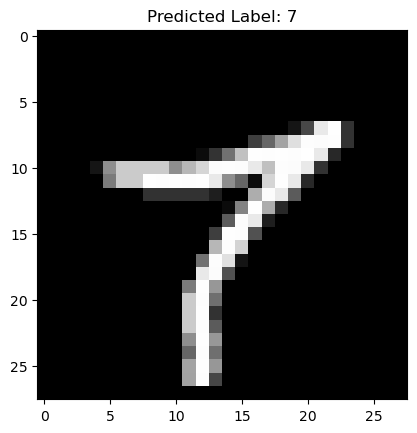

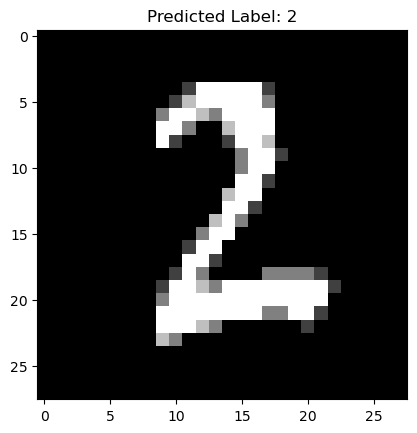

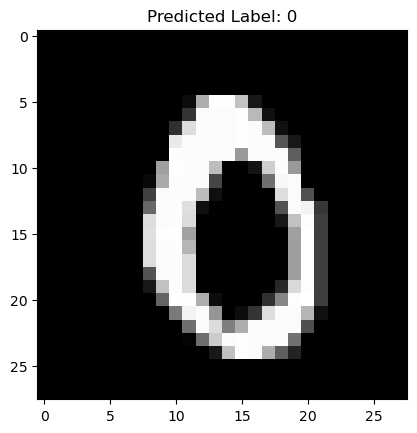

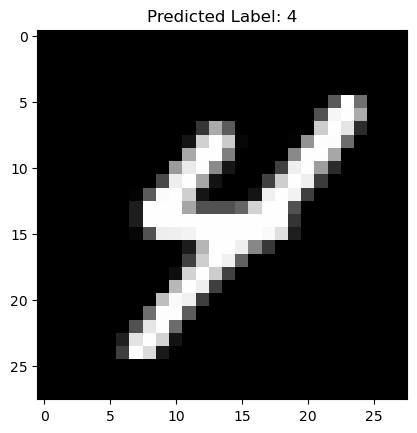

In [28]:
# Step 17: Visualize the first 5 test images with predicted labels (if applicable)
if X_test.shape[1] >= 28 * 28:
    for i in range(5):
        plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"Predicted Label: {y_pred[i]}")
        plt.show()
